In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df =pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.shape

(2200, 8)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There is no null values in the Dataset

In [18]:
df['label'].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

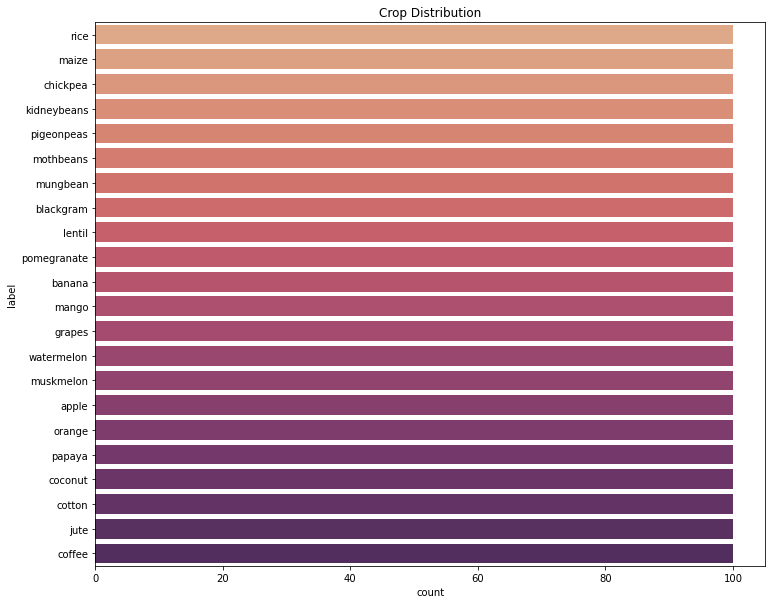

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(y="label",data=df, palette="flare")
plt.title("Crop Distribution")

plt.show()

In [23]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [24]:
#splitting the dataset in to dependent abd independent variable
X= df.drop('label',axis=1)
y=df['label']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
print(X_train.shape,y_train.shape)

(1540, 7) (1540,)


In [30]:
print(X_test.shape,y_test.shape)

(660, 7) (660,)


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
ytrain_pred =model1.predict(X_train)
ytest_pred = model1.predict(X_test)


C:\Users\NANO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import accuracy_score
training_acc =accuracy_score(y_train,ytrain_pred)
testing_acc =accuracy_score(y_test,ytest_pred)

print(f"Training Accuracy: {training_acc*100}%",f"Test_Accuracy: {testing_acc*100}%")

Training Accuracy: 97.53246753246754% Test_Accuracy: 97.57575757575758%


### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, random_state = 2)
model2.fit(X_train, y_train)
ytrain_pred =model2.predict(X_train)
ytest_pred = model2.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
training_acc =accuracy_score(y_train,ytrain_pred)
testing_acc =accuracy_score(y_test,ytest_pred)

print(f"Training Accuracy: {training_acc*100}%",f"Test_Accuracy: {testing_acc*100}%")

Training Accuracy: 99.8051948051948% Test_Accuracy: 98.33333333333333%


### Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=50,criterion='entropy'
                                ,random_state=1)
model3.fit(X_train, y_train)
ytrain_pred =model3.predict(X_train)
ytest_pred = model3.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
training_acc =accuracy_score(y_train,ytrain_pred)
testing_acc =accuracy_score(y_test,ytest_pred)

print(f"Training Accuracy: {training_acc*100}%",f"Test_Accuracy: {testing_acc*100}%")

Training Accuracy: 100.0% Test_Accuracy: 99.69696969696969%


### Gaussian NB 

In [95]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)
ytrain_pred =model4.predict(X_train)
ytest_pred = model4.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
training_acc =accuracy_score(y_train,ytrain_pred)
testing_acc =accuracy_score(y_test,ytest_pred)

print(f"Training Accuracy: {training_acc*100}%",f"Test_Accuracy: {testing_acc*100}%")

Training Accuracy: 99.48051948051948% Test_Accuracy: 99.54545454545455%


In [99]:
# From Above observations we choose Random Forest Classifier as model

import joblib
joblib.dump(model3,"Recommendation_model")

['Recommendation_model']

In [126]:
#arr = np.array(X_test.iloc[76])
arr = [[25,129,195,17.986678,81.177121,5.777271,72.371277]]

In [128]:
model3.predict(arr)

C:\Users\NANO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['grapes'], dtype=object)

In [132]:
model = joblib.load(open('Recommendation_model','rb'))

In [133]:
model.predict(arr)

C:\Users\NANO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['grapes'], dtype=object)